In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
# filename = 'elan_cleaned.txt'
filename = '../Phoenix/phoenix_master.txt'

In [243]:
file = open(filename, "r")

lines = file.readlines()

In [244]:
def splitter (lines):

    sentence_dict = {}
    token_dict = {}

    for line in lines:
        parts = line.split("\t")

        for word in parts[0].split(" "):
            word = word.strip('.,!:;"').lower()
            if word in sentence_dict:
                sentence_dict[word] += 1
            else:
                sentence_dict[word] = 1

        for token in parts[1].split(" "):
            token = token.strip('.,!:;"\n').upper()
            if token in token_dict:
                token_dict[token] += 1
            else:
                token_dict[token] = 1
    
    return sentence_dict, token_dict

def plot_bar(data, xlabel, ylabel, title):
    cmap = sns.color_palette("blend:#7AB,#EDA", n_colors=len(data))
        
    plt.figure(figsize=(16,8)) # Make it 14x7 inch
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    
    ax = sns.barplot(x=list(range(len(data))), y=data, palette=cmap, linewidth=0.5, alpha=0.7)
    
    for i, val in enumerate(data):
        ax.patches[i].set_facecolor(cmap[i])
        
    for i, val in enumerate(data):
        ax.patches[i].set_facecolor(plt.cm.viridis(i / len(data)))
    
    ax.set(xticklabels=[])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [245]:
sentence_dict, token_dict = splitter(lines)

In [246]:
sorted_sentence_dict = sorted(sentence_dict.items(), key=lambda x: x[1], reverse=True)
sorted_token_dict = sorted(token_dict.items(), key=lambda x: x[1], reverse=True)

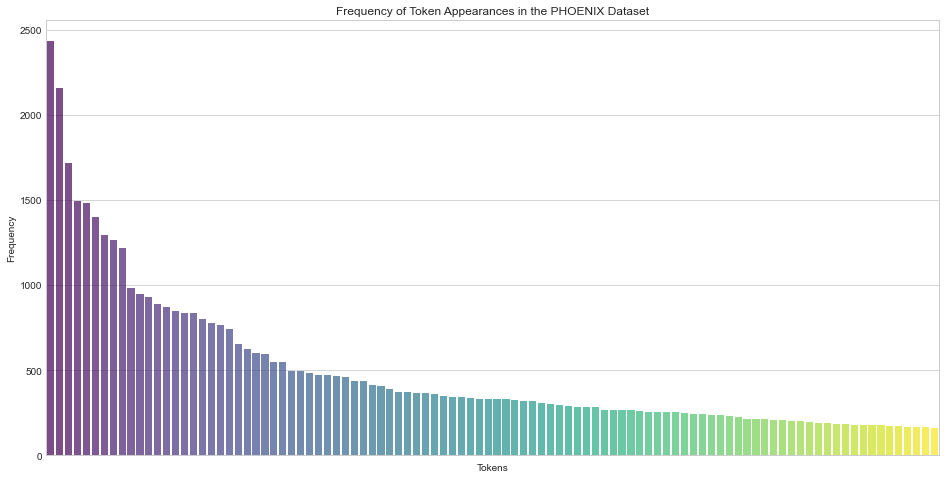

In [247]:
heights = []
for token, freq in sorted_token_dict:
    heights.append(freq)
plot_bar(heights[0:100], "Tokens", "Frequency", "Frequency of Token Appearances in the PHOENIX Dataset")

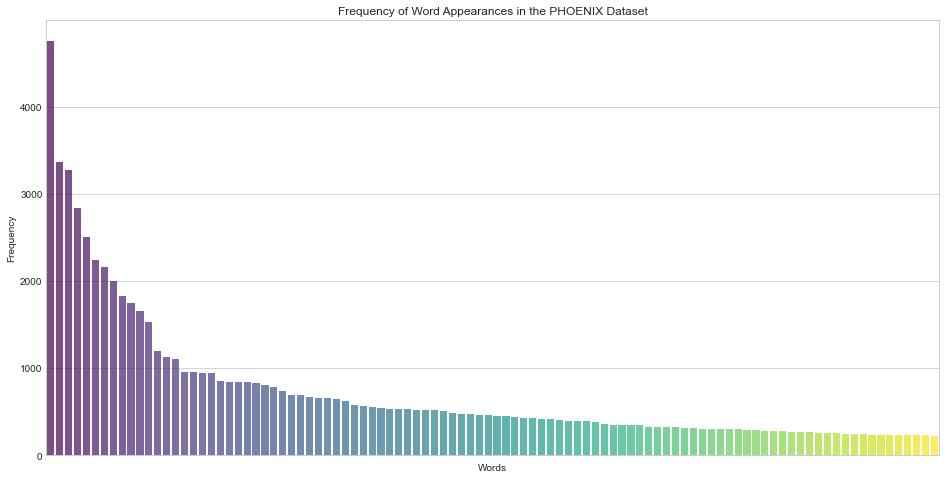

In [248]:
heights = []
for token, freq in sorted_sentence_dict:
    heights.append(freq)
plot_bar(heights[0:100], "Words", "Frequency", "Frequency of Word Appearances in the PHOENIX Dataset")

In [416]:
def plot_hist(sentences, index, bins, title, ylabel, xlabel):
    sentence_lengths = []

    for line in sentences:
        sentence = line.split("\t")
        count = sentence[index].count(" ")
        if count > 100:
            continue
        sentence_lengths.append(count + 1)    
    
    plt.figure(figsize=(14,7)) # Make it 14x7 inch
    plt.style.use('seaborn-whitegrid') # nice and clean grid

    n, bins, patches = plt.hist(sentence_lengths, bins=bins, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

    n = n.astype('int') # it MUST be integer
    
    print(n)

    # Good old loop. Choose colormap of your taste
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [417]:
filename = "elan_cleaned.txt"
# filename = '../Phoenix/phoenix_master.txt'

In [418]:
file = open(filename, "r")

lines = file.readlines()

[ 10   3  17  23  49  61  58  95 105 120 110 107 123 111 106 110  93 100
 104  76  77  59  55  55  29  33]


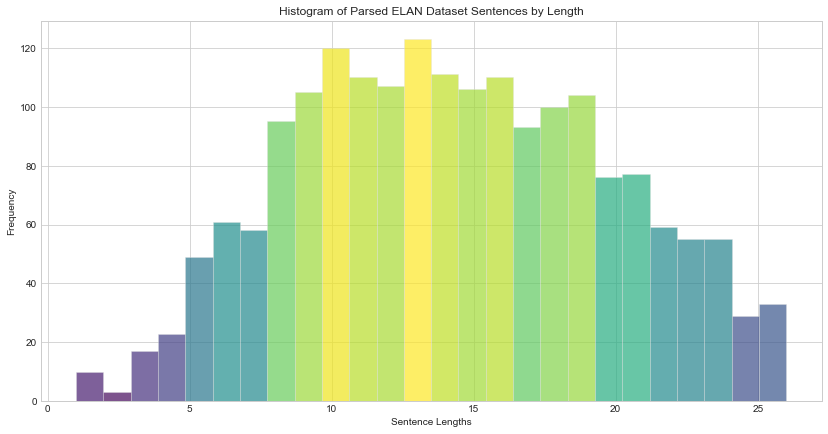

In [419]:
plot_hist(lines, 0, 26, "Histogram of Parsed ELAN Dataset Sentences by Length", "Frequency", "Sentence Lengths")

[ 44  92 129 132 149 157 165 124 125 120  90 100  75  72  59  42  45  27
  33  24  22  16  15  13   5  14]


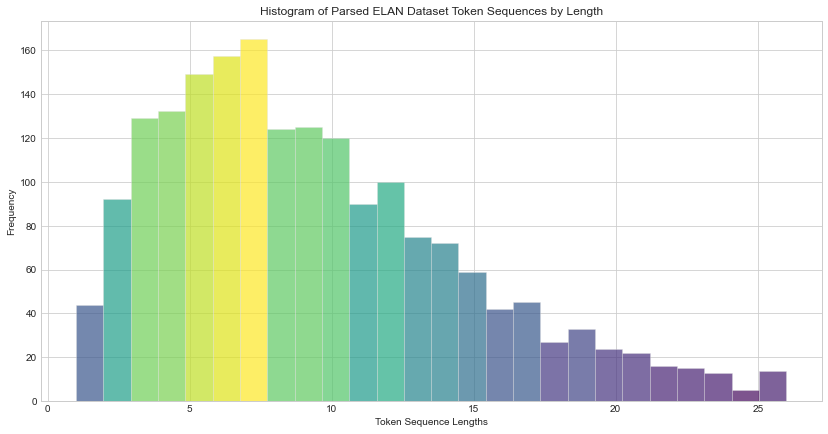

In [420]:
plot_hist(lines, 1, 26, "Histogram of Parsed ELAN Dataset Token Sequences by Length", "Frequency", "Token Sequence Lengths")